# Лабораторна робота 4

## Завдання

1. Виконати вирішення задачs класифікації для 3 класів з набору даних [food101](https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip)
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за [списком групи](https://docs.google.com/spreadsheets/d/1k6rqaOpWJkmzRzaXXWLZHYwsY4hskfiDkp91yw2BxfQ/edit#gid=0)
3. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
4. Результати викласти у репозиторії GitHub (папка Lab4).
5. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
train_path = 'data/train'
test_path = 'data/test'

In [3]:
img_classes = os.listdir(train_path)
img_classes

['croque_madame', 'ice_cream', 'seaweed_salad']

In [4]:
n = 13

In [5]:
img_classes_count = len(img_classes)

In [6]:
individual_img_classes = [(n - 1) % img_classes_count,
                          (n + 29) % img_classes_count,
                          (n + 59) % img_classes_count]

In [7]:
individual_img_classes = [img_classes[i] for i in individual_img_classes]
individual_img_classes

['croque_madame', 'croque_madame', 'croque_madame']

In [8]:
import shutil

In [43]:
for path in [train_path, test_path]:
    for filename in os.listdir(path):
        if filename not in individual_img_classes:
            print(f'DELETED: {os.path.join(path, filename)}')
            shutil.rmtree(os.path.join(path, filename))

DELETED: data/train\apple_pie
DELETED: data/train\baby_back_ribs
DELETED: data/train\baklava
DELETED: data/train\beef_carpaccio
DELETED: data/train\beef_tartare
DELETED: data/train\beet_salad
DELETED: data/train\beignets
DELETED: data/train\bibimbap
DELETED: data/train\bread_pudding
DELETED: data/train\breakfast_burrito
DELETED: data/train\bruschetta
DELETED: data/train\caesar_salad
DELETED: data/train\cannoli
DELETED: data/train\caprese_salad
DELETED: data/train\carrot_cake
DELETED: data/train\ceviche
DELETED: data/train\cheesecake
DELETED: data/train\cheese_plate
DELETED: data/train\chicken_curry
DELETED: data/train\chicken_quesadilla
DELETED: data/train\chicken_wings
DELETED: data/train\chocolate_cake
DELETED: data/train\chocolate_mousse
DELETED: data/train\churros
DELETED: data/train\clam_chowder
DELETED: data/train\club_sandwich
DELETED: data/train\crab_cakes
DELETED: data/train\creme_brulee
DELETED: data/train\cup_cakes
DELETED: data/train\deviled_eggs
DELETED: data/train\donuts


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
seed = 42

# Set the seed
np.random.seed(seed)
tf.random.set_seed(seed)

In [48]:
np.random.normal(3, 2.5, size=(2, 4))

array([[1.2999382 , 3.58063424, 3.73268118, 1.21412145],
       [7.66443628, 4.1845823 , 0.02174126, 4.64138402]])

In [11]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [12]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_path,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_path,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [69]:
tf.random.set_seed(seed)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,
                          activation='softmax')
])


In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data_augmented,
                    epochs=50,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 0.7966 - accuracy: 0.6222 - val_loss: 0.7926 - val_accuracy: 0.6280
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 0.7269 - accuracy: 0.6178 - val_loss: 0.7388 - val_accuracy: 0.6160
Epoch 3/50
8/8 [==============================] - 15s 2s/step - loss: 0.6841 - accuracy: 0.6311 - val_loss: 0.7203 - val_accuracy: 0.6160
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 0.7405 - accuracy: 0.5911 - val_loss: 0.8139 - val_accuracy: 0.6120
Epoch 5/50
8/8 [==============================] - 15s 2s/step - loss: 0.7009 - accuracy: 0.6489 - val_loss: 0.6608 - val_accuracy: 0.6387
Epoch 6/50
8/8 [==============================] - 16s 2s/step - loss: 0.7274 - accuracy: 0.6133 - val_loss: 0.8177 - val_accuracy: 0.5800
Epoch 7/50
8/8 [==============================] - 15s 2s/step - loss: 0.7122 - accuracy: 0.6711 - val_loss: 0.7299 - val_accuracy: 0.6627
Epoch 8/50
8/8 [==================

In [74]:
y_pred = model.predict(test_data)

In [75]:
y_pred

array([[2.6407342e-02, 1.9135507e-05, 9.7357351e-01],
       [8.7914461e-01, 2.6629478e-02, 9.4225891e-02],
       [5.6077647e-01, 3.8455728e-01, 5.4666214e-02],
       ...,
       [4.5258258e-03, 8.0471159e-07, 9.9547333e-01],
       [5.9883928e-01, 3.5537675e-01, 4.5783989e-02],
       [6.4771451e-02, 1.2810860e-03, 9.3394750e-01]], dtype=float32)

## Висновок
На даній лабораторній роботі мною було завантажено дані (картинки) для класифікації за обраним варіантом, було використано клас ImageDataGenerator для перетворень картинок, аби покращити генералізацію моделі за рахунок модифікацій картином, а також було побудовано CNN нейронну мережу, попередньо викоритсовуючи різні архітектури і порівнюючи результати. Було отримано точність в районі 70%

## Baseline models 

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

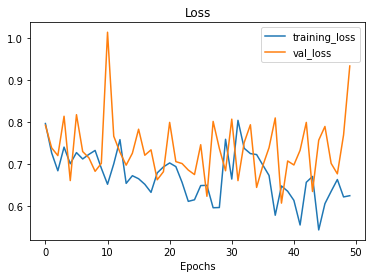

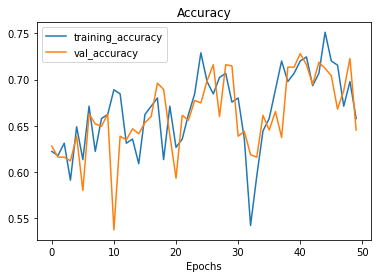

In [73]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

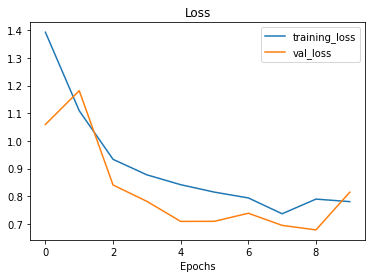

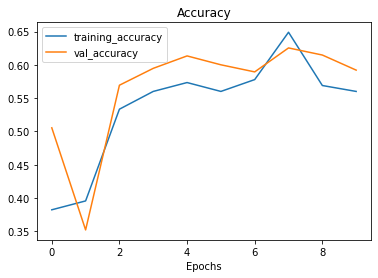

In [68]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

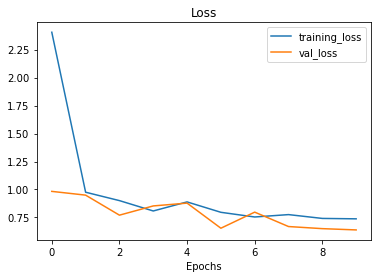

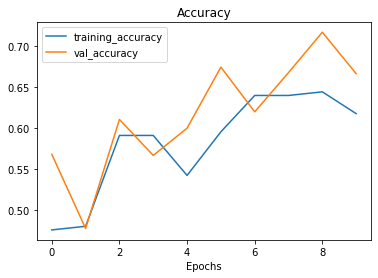

In [65]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),

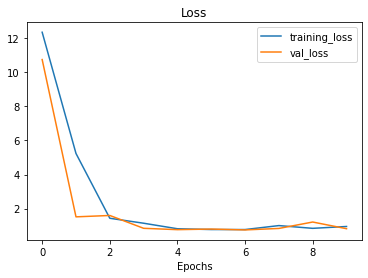

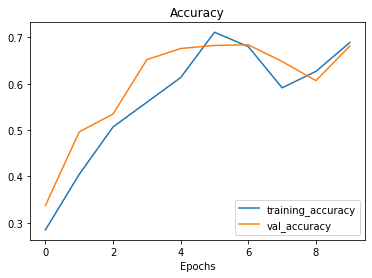

In [60]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),


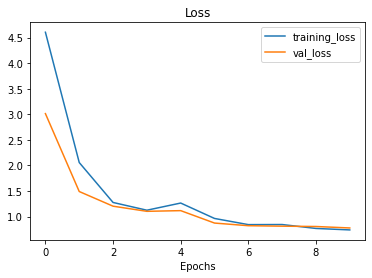

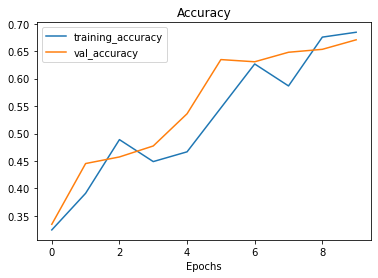

In [57]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=7,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),

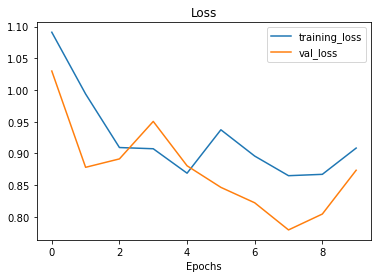

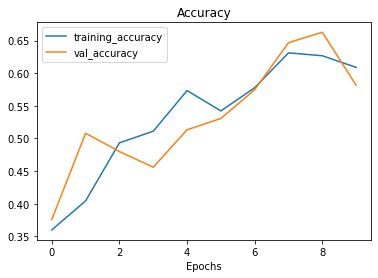

In [54]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=10,
                           kernel=2,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=1),
    tf.keras.layers.Conv2D(filters=10,
                           kernel=5,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel=5,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=1),

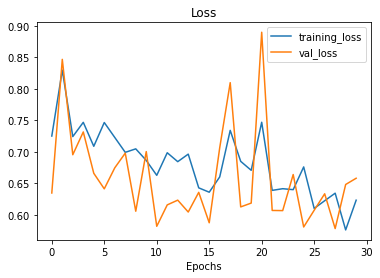

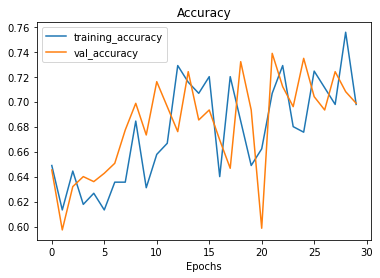

In [145]:
plot_loss_curves(history)

## Modified models 


    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=7,
                           activation='relu',
                           strides=1,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation='relu',
                           strides=1,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

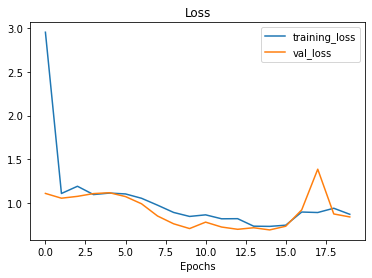

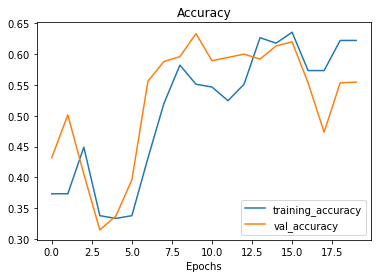

In [130]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation='relu',
                           strides=1,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=2,
                           activation='relu',
                           strides=1,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

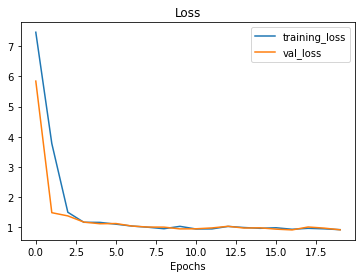

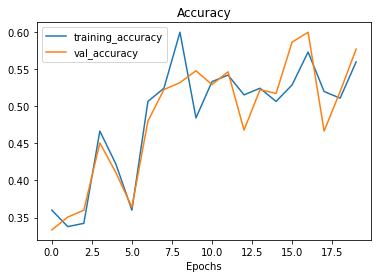

In [127]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=25,
                           activation='relu',
                           strides=5,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation='relu',
                           strides=2,
                           padding='valid',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

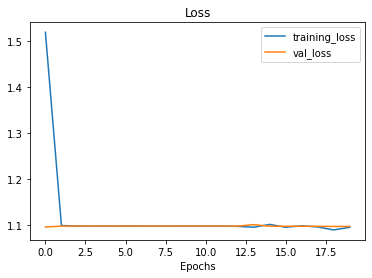

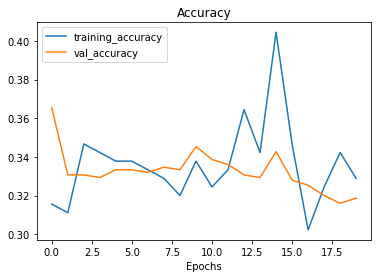

In [124]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation='relu',
                           strides=1,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=2,
                           activation='relu',
                           strides=2,
                           padding='valid',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

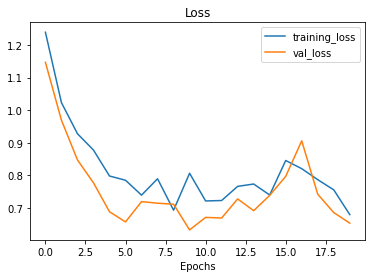

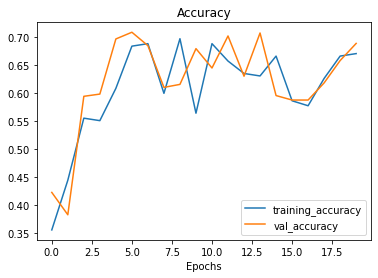

In [121]:
plot_loss_curves(history)

    tf.keras.layers.Conv2D(filters=15,
                           kernel_size=2,
                           activation='relu',
                           strides=1,
                           padding='same',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation='relu',
                           strides=2,
                           padding='valid',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=2,
                           activation='relu',
                           strides=2,
                           padding='same',
                           input_shape=(224, 224, 3)),

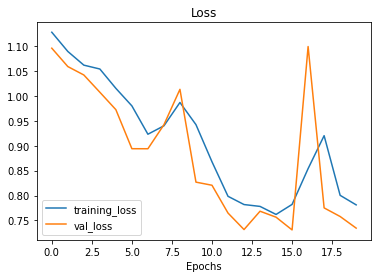

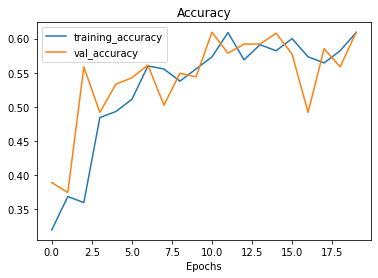

In [118]:
plot_loss_curves(history)